In [1]:

import pandas as pd

reviews = pd.read_parquet(path="reviews_equal_processed_prediction_3.parquet", use_nullable_dtypes=True,
                          engine='pyarrow')
reviews = reviews.sample(frac=1, random_state=42).reset_index(drop=True)
reviews.dropna(inplace=True)
reviews.info()
dataset_size = [10_000, 30_000, 50_000, 100_000, 300_000, 500_000]


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/oskar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /home/oskar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   review                               500000 non-null  string  
 1   appid                                500000 non-null  Int64   
 2   review_type                          500000 non-null  category
 3   review_type_encoded                  500000 non-null  Int64   
 4   logistic_500_000_prediction          500000 non-null  Int64   
 5   logistic_500_000_prediction_correct  500000 non-null  boolean 
 6   LSTM_500_000_prediction              500000 non-null  Int64   
 7   LSTM_500_000_prediction_correct      500000 non-null  boolean 
dtypes: Int64(4), boolean(2), category(1), string(1)
memory usage: 23.4 MB


In [2]:
reviews['review_type'].value_counts()

negative    250000
positive    250000
Name: review_type, dtype: int64

In [3]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, \
    precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

train_ratio = 0.7
dev_ratio = 0.15
test_ratio = 0.15
target_names = ['negative', 'positive']
reports = []
class_precision = []
class_recall = []
class_fscore = []
class_support = []
Name = []
Accuracy_dev = []
Precision_dev = []
F1_Score_dev = []
Recall_dev = []
Time_Taken_dev = []
Accuracy_test = []
Precision_test = []
F1_Score_test = []
Recall_test = []
Time_Taken_test = []
for amount in dataset_size:
    tfid = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    X = tfid.fit_transform(reviews['review'].head(amount))
    y = LabelEncoder().fit_transform(reviews['review_type'].head(amount))
    print(reviews['review_type'].head(amount).value_counts())
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42, stratify=y,
                                                        shuffle=True)
    X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=test_ratio / (test_ratio + dev_ratio),
                                                    random_state=42)

    name = 'LogisticRegression n=' + str(amount)
    Name.append(name)
    begin = time.time()
    model = LogisticRegression(random_state=42, n_jobs=-1, max_iter=10_000)
    model.fit(X_train, y_train)
    prediction = model.predict(X_dev)
    end = time.time()
    Accuracy_dev.append(accuracy_score(prediction, y_dev))
    Precision_dev.append(precision_score(prediction, y_dev, average='macro'))
    Recall_dev.append(recall_score(prediction, y_dev, average='macro'))
    F1_Score_dev.append(f1_score(prediction, y_dev, average='macro'))
    Time_Taken_dev.append(end - begin)
    print(name + ' Successfully Trained')
    begin = time.time()
    prediction_test = model.predict(X_test)
    end = time.time()
    reports.append(classification_report(
        y_test, prediction_test, target_names=target_names))
    precision, recall, fscore, support = precision_recall_fscore_support(
        y_test, prediction_test)
    class_precision.append(precision)
    class_recall.append(recall)
    class_fscore.append(fscore)
    class_support.append(support)
    Accuracy_test.append(accuracy_score(prediction_test, y_test))
    Precision_test.append(precision_score(
        prediction_test, y_test, average='macro'))
    Recall_test.append(recall_score(prediction_test, y_test, average='macro'))
    F1_Score_test.append(f1_score(prediction_test, y_test, average='macro'))
    Time_Taken_test.append(end - begin)
Dict_dev_unbalance = {'Name': Name, 'n': dataset_size, 'Accuracy_dev': Accuracy_dev,
                      'Precision_score_dev': Precision_dev, 'Recall_score_dev': Recall_dev,
                      'F1_score_dev': F1_Score_dev, 'Time Taken_dev': Time_Taken_dev}
Dict_test_unbalance = {'Name': Name, 'n': dataset_size, 'Accuracy_test': Accuracy_test,
                       'Precision_score_test': Precision_test, 'Recall_score_test': Recall_test,
                       'F1_score_test': F1_Score_test, 'Time Taken_test': Time_Taken_test}
model_df_dev_unbalance = pd.DataFrame(Dict_dev_unbalance)
# model_df_dev
model_df_test_unbalance = pd.DataFrame(Dict_test_unbalance)
model_df_test_unbalance


negative    5048
positive    4952
Name: review_type, dtype: int64
LogisticRegression n=10000 Successfully Trained
negative    15021
positive    14979
Name: review_type, dtype: int64
LogisticRegression n=30000 Successfully Trained
positive    25031
negative    24969
Name: review_type, dtype: int64
LogisticRegression n=50000 Successfully Trained
negative    50070
positive    49930
Name: review_type, dtype: int64
LogisticRegression n=100000 Successfully Trained
positive    150095
negative    149905
Name: review_type, dtype: int64
LogisticRegression n=300000 Successfully Trained
negative    250000
positive    250000
Name: review_type, dtype: int64
LogisticRegression n=500000 Successfully Trained


,Name,n,Accuracy_test,Precision_score_test,Recall_score_test,F1_score_test,Time Taken_test
0,LogisticRegression n=10000,10000,0.820120,0.819563,0.821015,0.819761,0.000470
1,LogisticRegression n=30000,30000,0.826039,0.826038,0.826038,0.826038,0.000591
2,LogisticRegression n=50000,50000,0.830689,0.830679,0.830694,0.830684,0.000836
3,LogisticRegression n=100000,100000,0.836411,0.836456,0.836510,0.836408,0.001312
4,LogisticRegression n=300000,300000,0.852514,0.852608,0.852773,0.852505,0.005124
5,LogisticRegression n=500000,500000,0.855509,0.855498,0.855752,0.855481,0.009320


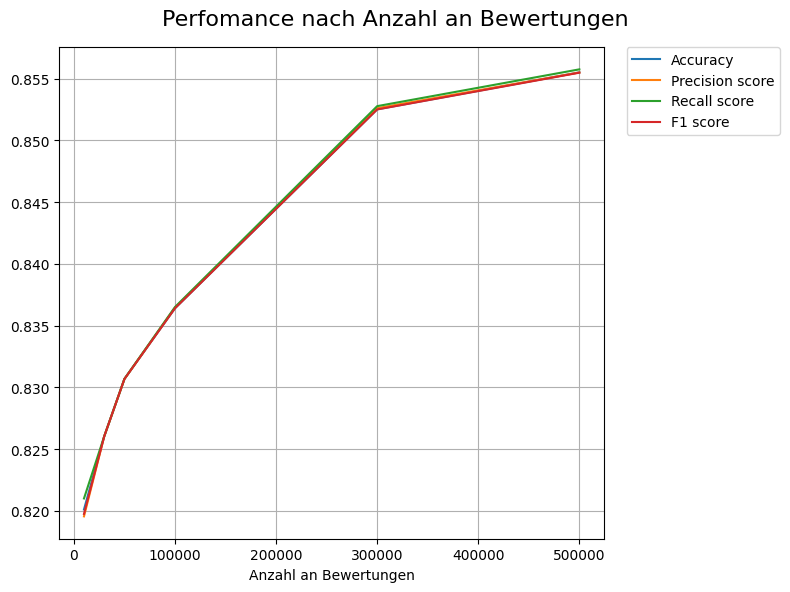

In [4]:
plt.rcParams["figure.figsize"] = 8, 6
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios": [9, 1]})
ax.plot(dataset_size, Accuracy_test, label="Accuracy")
ax.plot(dataset_size, Precision_test, label="Precision score")
ax.plot(dataset_size, Recall_test, label="Recall score")
ax.plot(dataset_size, F1_Score_test, label="F1 score")
ax.grid(True)
h, l = ax.get_legend_handles_labels()
lax.legend(h, l, borderaxespad=0)
lax.axis("off")
fig.suptitle('Performance nach Anzahl an Bewertungen', fontsize=16)
ax.set_xlabel('Anzahl an Bewertungen')
plt.tight_layout()


In [5]:
for report in reports:
    print(report)

              precision    recall  f1-score   support

    negative       0.81      0.85      0.83       765
    positive       0.83      0.79      0.81       736

    accuracy                           0.82      1501
   macro avg       0.82      0.82      0.82      1501
weighted avg       0.82      0.82      0.82      1501

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      2255
    positive       0.83      0.83      0.83      2246

    accuracy                           0.83      4501
   macro avg       0.83      0.83      0.83      4501
weighted avg       0.83      0.83      0.83      4501

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83      3736
    positive       0.83      0.83      0.83      3765

    accuracy                           0.83      7501
   macro avg       0.83      0.83      0.83      7501
weighted avg       0.83      0.83      0.83      7501

              preci

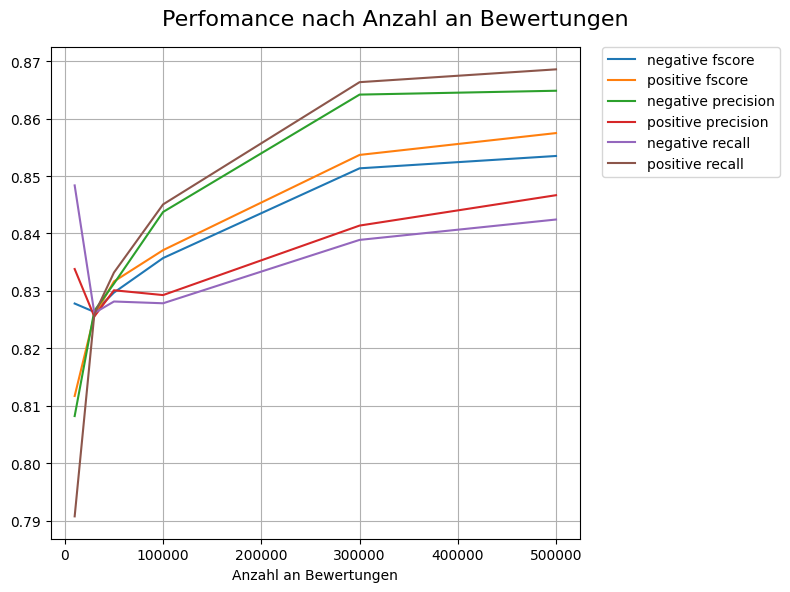

In [6]:
negative_fscore, positive_fscore = zip(*class_fscore)
negative_precision, positive_precision = zip(*class_precision)
negative_recall, positive_recall = zip(*class_recall)
negative_support, positive_support = zip(*class_support)
plt.rcParams["figure.figsize"] = 8, 6
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios": [8, 1]})
ax.plot(dataset_size, negative_fscore, label="negative F1 score")
ax.plot(dataset_size, positive_fscore, label="positive F1 score")
ax.plot(dataset_size, negative_precision, label="negative precision")
ax.plot(dataset_size, positive_precision, label="positive precision")
ax.plot(dataset_size, negative_recall, label="negative recall")
ax.plot(dataset_size, positive_recall, label="positive recall")
ax.grid(True)
h, l = ax.get_legend_handles_labels()
lax.legend(h, l, borderaxespad=0)
lax.axis("off")
fig.suptitle('Perfomance nach Anzahl an Bewertungen', fontsize=16)
ax.set_xlabel('Anzahl an Bewertungen')
plt.tight_layout()

In [7]:
# tfid = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
# X = tfid.fit_transform(reviews['review'].head(500_000))
# reviews['review_type_encoded'] = LabelEncoder().fit_transform(
#     reviews['review_type'].head(500_000))
# reviews['logistic_500_000_prediction'] = model.predict(X)
# reviews['logistic_500_000_prediction'] = reviews['logistic_500_000_prediction'].astype(
#     'category')
# reviews['logistic_500_000_prediction_correct'] = np.where((reviews['logistic_500_000_prediction'] == reviews['review_type_encoded']), bool(1),bool(0))
reviews['logistic_500_000_prediction_correct'].value_counts(normalize=True)

True     0.889864
False    0.110136
Name: logistic_500_000_prediction_correct, dtype: Float64

In [8]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import load_iris
# from sklearn.model_selection import LearningCurveDisplay, learning_curve
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import DecisionTreeClassifier

# X = tfid.fit_transform(reviews['review'])
# y = LabelEncoder().fit_transform(reviews['review_type'])
# tree = LogisticRegression(random_state=42, n_jobs=-1, max_iter=10_000)
# train_sizes, train_scores, test_scores = learning_curve(
#     tree, X, y, n_jobs=1, verbose=1, shuffle=True, random_state=42)
# display = LearningCurveDisplay(train_sizes=train_sizes,
#                                train_scores=train_scores, test_scores=test_scores, score_name="Score")
# display.plot()

# plt.show()


In [9]:
# reviews.to_parquet(
#     'reviews_equal_processed_prediction.parquet', engine='pyarrow')


### Unbalanced

In [13]:
reviews = pd.read_parquet(path="reviews2.5_processed_prediction3.parquet", use_nullable_dtypes=True, engine='pyarrow')
reviews = reviews.sample(frac=1, random_state=42).reset_index(drop=True)
reviews = reviews.head(500_000)
reviews.dropna(inplace=True)
reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 8 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   review                               500000 non-null  string  
 1   appid                                500000 non-null  Int64   
 2   review_type                          500000 non-null  category
 3   review_type_encoded                  500000 non-null  Int64   
 4   logistic_500_000_prediction          500000 non-null  Int64   
 5   logistic_500_000_prediction_correct  500000 non-null  boolean 
 6   LSTM_500_000_prediction              500000 non-null  Int64   
 7   LSTM_500_000_prediction_correct      500000 non-null  boolean 
dtypes: Int64(4), boolean(2), category(1), string(1)
memory usage: 23.4 MB


In [14]:
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, \
    precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

train_ratio = 0.7
dev_ratio = 0.15
test_ratio = 0.15
target_names = ['negative', 'positive']
reports_unbalance = []
class_precision = []
class_recall = []
class_fscore = []
class_support = []
Name = []
Accuracy_dev = []
Precision_dev = []
F1_Score_dev = []
Recall_dev = []
Time_Taken_dev = []
Accuracy_test = []
Precision_test = []
F1_Score_test = []
Recall_test = []
Time_Taken_test = []
for amount in dataset_size:
    tfid = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    X = tfid.fit_transform(reviews['review'].head(amount))
    y = LabelEncoder().fit_transform(reviews['review_type'].head(amount))
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio, random_state=42, stratify=y,
                                                        shuffle=True)
    X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=test_ratio / (test_ratio + dev_ratio),
                                                    random_state=42)

    name = 'LogisticRegression n=' + str(amount)
    Name.append(name)
    begin = time.time()
    model = LogisticRegression(random_state=42, n_jobs=-1, max_iter=10_000)
    model.fit(X_train, y_train)
    prediction = model.predict(X_dev)
    end = time.time()
    Accuracy_dev.append(accuracy_score(prediction, y_dev))
    Precision_dev.append(precision_score(prediction, y_dev, average='macro'))
    Recall_dev.append(recall_score(prediction, y_dev, average='macro'))
    F1_Score_dev.append(f1_score(prediction, y_dev, average='macro'))
    Time_Taken_dev.append(end - begin)
    print(name + ' Successfully Trained')
    begin = time.time()
    prediction_test = model.predict(X_test)
    end = time.time()
    reports_unbalance.append(classification_report(
        y_test, prediction_test, target_names=target_names))
    precision, recall, fscore, support = precision_recall_fscore_support(
        y_test, prediction_test)
    class_precision.append(precision)
    class_recall.append(recall)
    class_fscore.append(fscore)
    class_support.append(support)
    Accuracy_test.append(accuracy_score(prediction_test, y_test))
    Precision_test.append(precision_score(
        prediction_test, y_test, average='macro'))
    Recall_test.append(recall_score(prediction_test, y_test, average='macro'))
    F1_Score_test.append(f1_score(prediction_test, y_test, average='macro'))
    Time_Taken_test.append(end - begin)
Dict_dev = {'Name': Name, 'n': dataset_size, 'Accuracy_dev': Accuracy_dev, 'Precision_score_dev': Precision_dev,
            'Recall_score_dev': Recall_dev,
            'F1_score_dev': F1_Score_dev, 'Time Taken_dev': Time_Taken_dev}
Dict_test = {'Name': Name, 'n': dataset_size, 'Accuracy_test': Accuracy_test, 'Precision_score_test': Precision_test,
             'Recall_score_test': Recall_test,
             'F1_score_test': F1_Score_test, 'Time Taken_test': Time_Taken_test}
model_df_dev = pd.DataFrame(Dict_dev)
# model_df_dev
model_df_test = pd.DataFrame(Dict_test)
model_df_test


LogisticRegression n=10000 Successfully Trained
LogisticRegression n=30000 Successfully Trained
LogisticRegression n=50000 Successfully Trained
LogisticRegression n=100000 Successfully Trained
LogisticRegression n=300000 Successfully Trained
LogisticRegression n=500000 Successfully Trained


,Name,n,Accuracy_test,Precision_score_test,Recall_score_test,F1_score_test,Time Taken_test
0,LogisticRegression n=10000,10000,0.866089,0.549159,0.910602,0.553343,0.000766
1,LogisticRegression n=30000,30000,0.872695,0.592170,0.826732,0.620172,0.000772
2,LogisticRegression n=50000,50000,0.877883,0.623582,0.861443,0.662345,0.000746
3,LogisticRegression n=100000,100000,0.893407,0.675539,0.862676,0.723141,0.001032
4,LogisticRegression n=300000,300000,0.904491,0.731222,0.866610,0.776243,0.004456
5,LogisticRegression n=500000,500000,0.905948,0.741734,0.863899,0.784370,0.006114


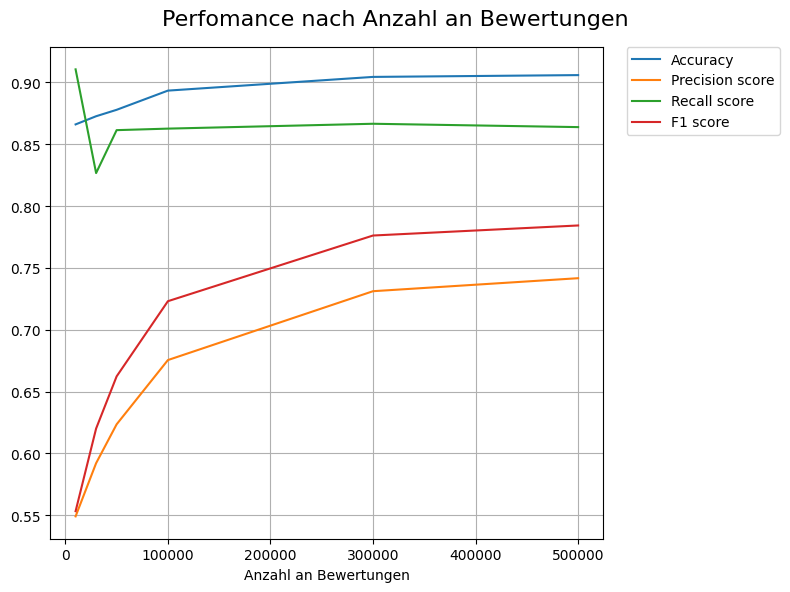

In [15]:
plt.rcParams["figure.figsize"] = 8, 6
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios": [9, 1]})
ax.plot(dataset_size, Accuracy_test, label="Accuracy")
ax.plot(dataset_size, Precision_test, label="Precision score")
ax.plot(dataset_size, Recall_test, label="Recall score")
ax.plot(dataset_size, F1_Score_test, label="F1 score")
ax.grid(True)
h, l = ax.get_legend_handles_labels()
lax.legend(h, l, borderaxespad=0)
lax.axis("off")
fig.suptitle('Performance nach Anzahl an Bewertungen', fontsize=16)
ax.set_xlabel('Anzahl an Bewertungen')
plt.tight_layout()


In [16]:
for report in reports_unbalance:
    print(report)

              precision    recall  f1-score   support

    negative       0.96      0.10      0.18       222
    positive       0.86      1.00      0.93      1279

    accuracy                           0.87      1501
   macro avg       0.91      0.55      0.55      1501
weighted avg       0.88      0.87      0.82      1501

              precision    recall  f1-score   support

    negative       0.78      0.19      0.31       665
    positive       0.88      0.99      0.93      3836

    accuracy                           0.87      4501
   macro avg       0.83      0.59      0.62      4501
weighted avg       0.86      0.87      0.84      4501

              precision    recall  f1-score   support

    negative       0.84      0.26      0.39      1157
    positive       0.88      0.99      0.93      6344

    accuracy                           0.88      7501
   macro avg       0.86      0.62      0.66      7501
weighted avg       0.87      0.88      0.85      7501

              preci

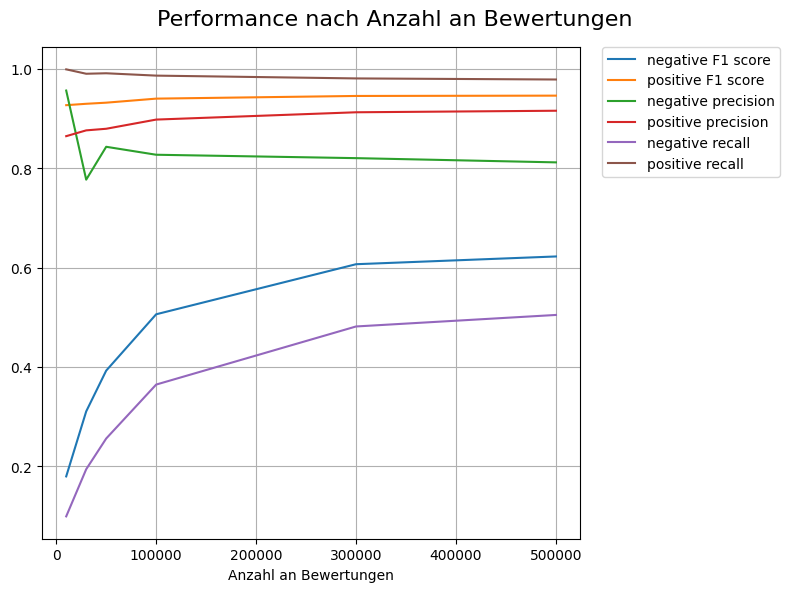

In [21]:
negative_fscore, positive_fscore = zip(*class_fscore)
negative_precision, positive_precision = zip(*class_precision)
negative_recall, positive_recall = zip(*class_recall)
negative_support, positive_support = zip(*class_support)
plt.rcParams["figure.figsize"] = 8, 6
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios": [9, 1]})
ax.plot(dataset_size, negative_fscore, label="negative F1 score")
ax.plot(dataset_size, positive_fscore, label="positive F1 score")
ax.plot(dataset_size, negative_precision, label="negative precision")
ax.plot(dataset_size, positive_precision, label="positive precision")
ax.plot(dataset_size, negative_recall, label="negative recall")
ax.plot(dataset_size, positive_recall, label="positive recall")
ax.grid(True)
h, l = ax.get_legend_handles_labels()
lax.legend(h, l, borderaxespad=0)
lax.axis("off")
fig.suptitle('Performance nach Anzahl an Bewertungen', fontsize=16)
ax.set_xlabel('Anzahl an Bewertungen')
plt.tight_layout()


In [18]:
# tfid = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
# X = tfid.fit_transform(reviews['review'].head(500_000))
# reviews['review_type_encoded'] = LabelEncoder().fit_transform(reviews['review_type'].head(500_000))
# reviews['logistic_500_000_prediction'] = model.predict(X)
# reviews['logistic_500_000_prediction'] = reviews['logistic_500_000_prediction'].astype(
#     'category')
# reviews['logistic_500_000_prediction_correct'] = np.where((reviews['logistic_500_000_prediction'] == reviews['review_type_encoded']), bool(1),
#                                                           bool(0))
# reviews['logistic_500_000_prediction_correct'].value_counts(normalize=True)


In [19]:
review_sentiment_per_game_log = reviews.groupby(['appid', 'review_type',
                                                 'logistic_500_000_prediction_correct']).logistic_500_000_prediction_correct.count().unstack()
review_sentiment_per_game_log.head(10)

logistic_500_000_prediction_correct  False  True 
appid review_type                                
10    negative                          66     36
      positive                          44   4943
40    negative                          84     58
      positive                          23    609
60    negative                         177     92
      positive                          41   1505
70    negative                         134     60
      positive                          33   5387
80    negative                         196    130
      positive                          56   3885

In [20]:
review_sentiment_per_game_LSTM = reviews.groupby(
    ['appid', 'review_type', 'LSTM_500_000_prediction_correct']).logistic_500_000_prediction_correct.count().unstack()
review_sentiment_per_game_LSTM.head(10)

LSTM_500_000_prediction_correct  False  True 
appid review_type                            
10    negative                      47     55
      positive                      94   4893
40    negative                      65     77
      positive                      43    589
60    negative                     111    158
      positive                      90   1456
70    negative                      87    107
      positive                     102   5318
80    negative                     142    184
      positive                     120   3821

In [ ]:
# reviews.to_parquet('reviews2.5_processed_prediction.parquet', engine='pyarrow')
